# <font color=#FF1493>Bio-Inspired Learning</font>

## <font color=#FF69B4>#Bioinspired Artificial Intelligence Algorithms - ACO - 5 nodes</font>

---
* #### This Notebooks is based on the <font color=yellow>Udemy course </font>

> [Bio-inspired Artificial Intelligence Algorithms for Optimization](https://www.udemy.com/course/bio-inspired-artificial-intelligence-algorithms-for-optimization/)
---
---
### <font color=#C0C0C0>Master of Science in Signal Theory and Communications (MUTSC)</font>
### *Signal processing and machine learning for big data*
## <font color=orange>ETSIT - UPM</font>
---


Creating the edges

In [100]:
import random

ab = ['AB',['BD','BE','BC'],5,1]
bc = ['BC',['CD','CE'],11,1]
ac = ['AC',['CB','CD','CE'],6,1]
cb = ['CB',['BD','BE'],11,1]
ae = ['AE',[],30,1]
cd = ['CD',['DE'],17,1]
bd = ['BD',['DC','DE'],6,1]
ce = ['CE',[],10,1]
be = ['BE',[],16,1]
de = ['DE',[],4,1]
dc = ['DC',['CE'],17,1]

edges = [ab,bc,ac,cb,ae,cd,bd,ce,be,de,dc]

In [101]:
# Print edges information

# edge number
for i in range(len(edges)):
  print('Edge:', i, ' name: ', edges[i][0] , ' adjacents: ' ,
      edges[i][1] , ' distance: ' , edges[i][2] , 'pheromone: ', edges[i][3])


Edge: 0  name:  AB  adjacents:  ['BD', 'BE', 'BC']  distance:  5 pheromone:  1
Edge: 1  name:  BC  adjacents:  ['CD', 'CE']  distance:  11 pheromone:  1
Edge: 2  name:  AC  adjacents:  ['CB', 'CD', 'CE']  distance:  6 pheromone:  1
Edge: 3  name:  CB  adjacents:  ['BD', 'BE']  distance:  11 pheromone:  1
Edge: 4  name:  AE  adjacents:  []  distance:  30 pheromone:  1
Edge: 5  name:  CD  adjacents:  ['DE']  distance:  17 pheromone:  1
Edge: 6  name:  BD  adjacents:  ['DC', 'DE']  distance:  6 pheromone:  1
Edge: 7  name:  CE  adjacents:  []  distance:  10 pheromone:  1
Edge: 8  name:  BE  adjacents:  []  distance:  16 pheromone:  1
Edge: 9  name:  DE  adjacents:  []  distance:  4 pheromone:  1
Edge: 10  name:  DC  adjacents:  ['CE']  distance:  17 pheromone:  1


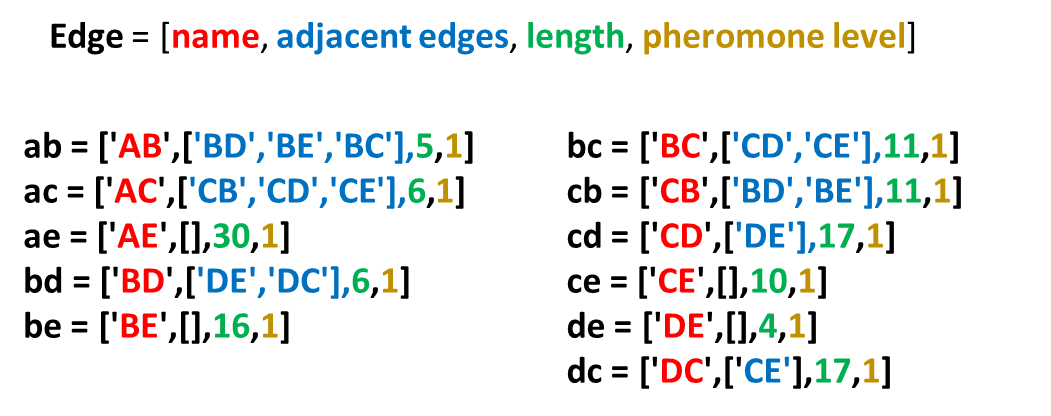

Probability of edge selection

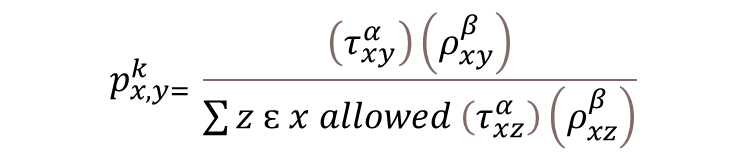

* ### Probabilities for edge selection:

> starting in A possible edges AB, AC and AE

In [102]:
def probabs(adja):
  dists = []
  fer = []
  for i in adja:
    for j in edges:
      if j[0] == i:
        dists.append(j[2])
        fer.append(j[3])

  attractivities = []
  count = 0
  while count < len(adja):
    atract = fer[count]*(1/(dists[count]))
    attractivities.append(atract)
    count += 1

  summ = sum(attractivities)
  probs = []
  for i in attractivities:
    prob = (i/summ)
    probs.append(prob)

  return probs


In [103]:
probabs(['AB','AC','AE'])

[0.5, 0.41666666666666663, 0.08333333333333333]

### Choosing adjacent edges

Understand this:

*   3 thresholds from probs [0.5, 0.4, 0] -> thresholds [0.5, 0.9, 1]
*   to make a random selection using a [0,1] uniform random variable r 

In [104]:
def chooseEdges(adjs):
  probab = probabs(adjs)
  thresholds = []
  summ = 0
  for i in probab:
    summ += i
    thresholds.append(summ)
  r = random.random()
  count = 0
  for i in thresholds:
    if r > i:
      count += 1
  return adjs[count]


In [105]:
probabs(['AB','AC','AE'])


[0.5, 0.41666666666666663, 0.08333333333333333]

In [106]:
chooseEdges(['AB','AC','AE'])



'AB'

* ### Function to define an ant:
> NOTE: every ant is really a random path from A to E !

In [107]:
def ant():
  starters = [ab,ac,ae]
  path = []

  starter = chooseEdges(['AB','AC','AE'])
  path.append(starter)

  if 'E' in path[-1]: # path END reached!
    return path
  else:
    while True:
      for i in edges:
        if path[-1] == i[0]: # move to next random edge ...
          adj = i[1]
          if len(adj)==0:  # .. if adjacents
            break
          else:
            adj_random = chooseEdges(adj)
            path.append(adj_random)
      return path
      break


* #### See 10 ants = 10 random paths from A to E !

In [108]:
for i in range(10):
  print('Ant: ', i, 'randomly selected path:', ant())


Ant:  0 randomly selected path: ['AB', 'BD', 'DE']
Ant:  1 randomly selected path: ['AB', 'BD', 'DE']
Ant:  2 randomly selected path: ['AC', 'CD', 'DE']
Ant:  3 randomly selected path: ['AC', 'CB', 'BD', 'DE']
Ant:  4 randomly selected path: ['AB', 'BD', 'DE']
Ant:  5 randomly selected path: ['AB', 'BD', 'DE']
Ant:  6 randomly selected path: ['AC', 'CB', 'BD', 'DC', 'CE']
Ant:  7 randomly selected path: ['AE']
Ant:  8 randomly selected path: ['AB', 'BD', 'DE']
Ant:  9 randomly selected path: ['AB', 'BD', 'DE']


Path length calculation

In [109]:
def length(ant):
  summ = 0
  for i in ant:
    for j in edges:
      if i == j[0]:
        summ += j[2]
  return summ


* ### lenght 0! if NO path between nodes (i.e. length(['AD'] = 0)

In [110]:
length(['AD'])


0

In [111]:
length(['AC', 'CE'])

16

Updating pheromone levels

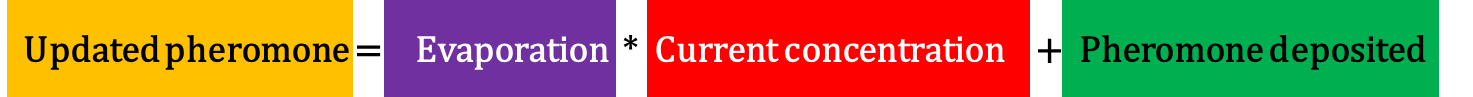

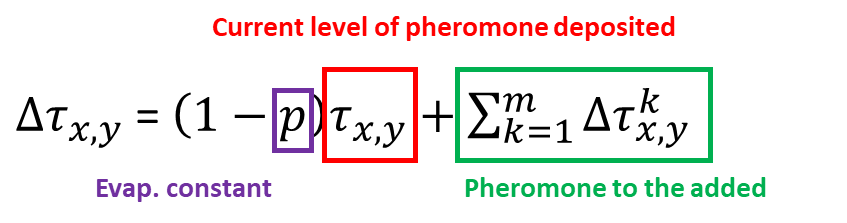

In [112]:
#Pheromone evaporation

def evaporation(evap):
  for i in edges:
    i[3] = i[3]*(1-evap)

#Pheromone Update

def update_pherom(ants):
  for i in ants:
    pherom = 1/(length(i))
    for j in i:
      for k in edges:
        if k[0] == j:
          k[3] = k[3] + pherom


In [113]:
for i in edges:
  print(i)


['AB', ['BD', 'BE', 'BC'], 5, 1]
['BC', ['CD', 'CE'], 11, 1]
['AC', ['CB', 'CD', 'CE'], 6, 1]
['CB', ['BD', 'BE'], 11, 1]
['AE', [], 30, 1]
['CD', ['DE'], 17, 1]
['BD', ['DC', 'DE'], 6, 1]
['CE', [], 10, 1]
['BE', [], 16, 1]
['DE', [], 4, 1]
['DC', ['CE'], 17, 1]


In [114]:
evaporation(0.3)

for i in edges:
  print(i)



['AB', ['BD', 'BE', 'BC'], 5, 0.7]
['BC', ['CD', 'CE'], 11, 0.7]
['AC', ['CB', 'CD', 'CE'], 6, 0.7]
['CB', ['BD', 'BE'], 11, 0.7]
['AE', [], 30, 0.7]
['CD', ['DE'], 17, 0.7]
['BD', ['DC', 'DE'], 6, 0.7]
['CE', [], 10, 0.7]
['BE', [], 16, 0.7]
['DE', [], 4, 0.7]
['DC', ['CE'], 17, 0.7]


In [115]:
ants = [['AB','BD', 'DE'],['AE']]
update_pherom(ants)

for i in edges:
  print(i)




['AB', ['BD', 'BE', 'BC'], 5, 0.7666666666666666]
['BC', ['CD', 'CE'], 11, 0.7]
['AC', ['CB', 'CD', 'CE'], 6, 0.7]
['CB', ['BD', 'BE'], 11, 0.7]
['AE', [], 30, 0.7333333333333333]
['CD', ['DE'], 17, 0.7]
['BD', ['DC', 'DE'], 6, 0.7666666666666666]
['CE', [], 10, 0.7]
['BE', [], 16, 0.7]
['DE', [], 4, 0.7666666666666666]
['DC', ['CE'], 17, 0.7]


Running the algorithm

In [121]:
#Running the algorithm

for i in range(2): # number of generations
  evaporation(0.3)
  ants = []
  for j in range(5): # number of ants oer generation
    ants.append(ant())
  update_pherom(ants)


for i in edges:
  print(i[0],i[3])

for k in ants:
  print(k)



AB 0.9800949377213831
BC 0.013947012144650094
AC 0.08594455774301632
CB 0.0385795470018589
AE 0.011750970358399988
CD 0.014562041565134425
BD 0.9778681243901071
CE 0.05844849198997306
BE 0.03654824922918483
DE 0.9807316552859415
DC 0.011698510669299993
['AB', 'BD', 'DE']
['AB', 'BD', 'DE']
['AB', 'BD', 'DE']
['AB', 'BD', 'DE']
['AB', 'BD', 'DE']
